In [39]:
%load_ext autoreload
%autoreload 2
import os
import glob
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
pd.options.display.max_columns = 999
import sys
sys.path.append("../../Code")
import vader
import settings as s
import utils 
import seaborn as sns 
import afinns as af
import s140
import opinion_lexicon as op
import so_cal as sc

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Load Data

In [40]:
reviews = pd.read_csv(os.path.join('..','2','len_lang_restrict_reviews.csv'), index_col=0)

In [41]:
len(reviews)

225090

In [42]:
corrected_reviews = pd.read_csv(os.path.join('..','5','guest_reviews_spell.csv'), index_col=0)

In [44]:
new_sat = corrected_reviews[(corrected_reviews.isTranslated == 1) |(corrected_reviews.isCorrected == 1)]

In [180]:
reviews = pd.read_csv('reviews_with_sent.csv', index_col=0)

# Sentiment analysis tools 

# Afinn - overall

In [45]:
new_sat['afinn'] = new_sat.comments.map(lambda x: af.get_score(x))

/Users/lynraybarends/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [67]:
new_sat.to_csv('reviews_with_sent_corrected.csv')

## Vader - Overall

In [48]:
new_sat['vader'] = new_sat.comments.map(lambda x: vader.get_score(x))

/Users/lynraybarends/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


# S140

In [50]:
s140.save_review_s140(new_sat,'reviews', path='new_reviews/')

In [51]:
s140_dir = "new_reviews/s140/overall/out/"

In [53]:
new_sat = s140.read_s140_scores(s140_dir, new_sat)

29471 Index(['string'], dtype='object')


../../Code/s140.py:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  table['s140'] = table.join(df.set_index('sid'), on='id')['s140']


# SO-CAL

In [58]:
sc.save_review_so_cal(new_sat, 'comments',dir='new_reviews/')

In [60]:
new_sat = sc.get_overall_sent('so_cal/overall/out/file_sentiment.csv', new_sat)

../../Code/so_cal.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  table['so_cal'] = table.join(df.set_index('so_cal_id'), on='id')['Score']


In [61]:
new_sat.is_copy = False

## Add opinion Lexicon Scores

In [63]:
new_sat['opinion_bow'] = new_sat.comments.map(lambda x: op.get_score(x))

In [62]:
new_sat['opinion_freq'] = new_sat.comments.map(lambda x: op.get_score(x, "freq"))

### AFINN-Sentence Level

In [204]:
needs_new['afinn-sent'] = needs_new.comments.map(lambda x: af.get_sentence_level_sent(x))

/Users/lynraybarends/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


### Vader sentence Level

In [207]:
needs_new['vader-sent'] = needs_new.comments.map(lambda x: vader.get_sentence_level_sent(x))

/Users/lynraybarends/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


### Opinion Lexion BOW Sentence Level 

In [205]:
needs_new['opinion_bow_sent'] = needs_new.comments.map(lambda x: op.get_sentence_level_sent(x))

/Users/lynraybarends/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


### Opinion Lexion Freq Sentence Level 

In [206]:
needs_new['opinion_freq_sent'] = needs_new.comments.map(lambda x: op.get_sentence_level_sent(x, "freq"))

/Users/lynraybarends/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


### Sentiment-140 sentence Level

In [209]:
s140.save_review_sentence_short(needs_new,path="new_rev/")

In [210]:
s140_dir = 'new_rev/s140/sent/out/'

In [211]:
needs_new['s140_sent'] = s140.get_sentence_level_sent(s140_dir, needs_new )

/Users/lynraybarends/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


### SO_CAL sentence level

In [213]:
sc.save_review_sentence(needs_new, 'comments', dir='new_rev/')

In [214]:
so_cal_dir = 'new_rev/so_cal/sent/out/file_sentiment.csv'

In [215]:
needs_new['so_cal_sent'] = sc.get_sentence_level_sent(so_cal_dir, needs_new)

/Users/lynraybarends/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [216]:
len(needs_new)

11962

In [217]:
needs_new[needs_new['so_cal_sent'].isnull()]

,idGuestReview,id,date,reviewer_id,listing_id,recipient_id,comments,hostCancelled,token_len,num_of_sents,google_langs,google_langs_conf,langdetect_langs,langdetect_langs_conf,isTranslated,isCorrected,afinn,vader,s140,so_cal,opinion_freq,opinion_bow,afinn-sent,vader-sent,opinion_bow_sent,opinion_freq_sent,s140_sent,so_cal_sent,tool_sent_len


In [220]:
needs_new

,idGuestReview,id,date,reviewer_id,listing_id,recipient_id,comments,hostCancelled,token_len,num_of_sents,google_langs,google_langs_conf,langdetect_langs,langdetect_langs_conf,isTranslated,isCorrected,afinn,vader,s140,so_cal,opinion_freq,opinion_bow,afinn-sent,vader-sent,opinion_bow_sent,opinion_freq_sent,s140_sent,so_cal_sent,tool_sent_len
209,447,1129816,2012-04-14,1857814,4989,7118,"Great location! It was stylish, fun and smelled great! We didn' t meet but he communictated well and he had nice friends that helped out when needed. thank youuuu! !",N,29,5,en,1.0,en,0.999998,1,1,15.0,0.9466,4,4.500000,0.241379,0.400000,"[3.0, 7.0, 3.0, 2.0, 0.0]","[0.6588, 0.8268, 0.8885, 0.4199, 0.0]","[0.5, 0.5, 0.375, 0.5, 0]","[0.5, 0.2857142857142857, 0.16666666666666666, 0.5, 0]","[2, 4, 2, 2, 2]","[0.0, 7.333333333333332, 3.0, 4.0, 0.0]",2
211,449,1624497,2012-07-03,1810355,4989,7118,Excellent location. Small and a little cramped for 3 people but clean and has everything you need.,N,17,2,en,1.0,en,0.999997,1,0,5.0,0.7096,2,0.600000,0.058824,0.100000,"[3.0, 2.0]","[0.5719, 0.5499]","[0.5, 0.0]","[0.5, 0.0]","[2, 2]","[5.0, -0.5]",1
220,458,75322110,2016-05-20,14244953,4989,7118,Russel was great. Very easy to communicate with him. Really helpful. The place is exactly as listed. Great place to explore the city. Close to everything. Thanks,N,27,7,en,1.0,en,0.999997,1,0,11.0,0.4404,4,2.120000,0.148148,0.214286,"[3.0, 1.0, 2.0, 0.0, 3.0, 0.0, 2.0]","[0.6249, 0.4927, 0.4754, 0.0, 0.6249, 0.0, 0.4404]","[0.5, 0.5, 0.5, 0.0, 0.25, 0.0, 0.0]","[0.3333333333333333, 0.16666666666666666, 0.5, 0.0, 0.16666666666666666, 0.0, 0.0]","[2, 2, 2, 2, 2, 2, 2]","[4.0, 1.1, 2.4, 0.0, 4.0, 0.0, 0.0]",1
237,475,13411,2009-10-12,42932,5099,7322,"very enjoyable. tina was great. you must like cats. i repeat you must like cats. i do, so i had no problem. the five flight walkup can be hard after a long day out but it was worth it. very close to grand central station so you can get anywhere in manhattan. grocery storesd, bars, restaurant are all nearby on third st also lexington. it is an older buildind but very safe area. thanks tina it w...",N,78,8,en,1.0,en,0.999997,1,0,16.0,0.9575,4,1.883333,0.076923,0.111111,"[2.0, 3.0, 2.0, 2.0, -3.0, 1.0, 3.0, 0.0, 1.0, 5.0]","[0.4927, 0.6249, 0.3612, 0.3612, -0.6643, 0.2846, 0.5046, 0.0, 0.6474, 0.7906]","[1.0, 0.5, 0.3333333333333333, 0.25, -1.0, 0.0, 0.14285714285714285, 0.0, 0.25, 0.3333333333333333]","[0.5, 0.3333333333333333, 0.25, 0.16666666666666666, -0.14285714285714285, 0.0, 0.07692307692307693, 0.0, 0.1111111111111111, 0.2]","[2, 2, 2, 2, 2, 2, 2, 2, 2, 4]","[4.8, 4.0, 0.0, 0.0, 0.0, 0.25, 2.5, 0.0, 0.825, 4.0]",1
239,477,18812,2009-11-30,46739,5099,7322,"Amazing Apt To Stay in While Visiting NY, 5 minute Walk to Grand Central, 10 minute walk To Time Square, About 5 Block Or So to The Famous 5th Ave. Apt Was Clean, Spacious And very Cozy. Cats were Very Sweet And The Neighborhood Was Great, nice place to Just Come Home To Relax And Watch Cable After A Day On The Town. Thank you So Much Tina, If we Ever Visit NY Again We Will Be Sure to Look you...",N,105,7,en,1.0,en,0.999997,1,0,25.0,0.9771,4,2.000000,0.104762,0.200000,"[8.0, 3.0, 8.0, 2.0, 2.0, 2.0]","[0.5994, 0.4019, 0.92, 0.6239, 0.7003, 0.3612]","[0.17647058823529413, 0.75, 0.23076923076923078, 0.125, 0.0, 1.0]","[0.1, 0.42857142857142855, 0.11538461538461539, 0.05263157894736842, 0.0, 0.3333333333333333]","[2, 2, 4, 2, 4, 2]","[0.0, 2.0, 2.0, 4.0, 1.0, 0.0]",2
287,525,112038106,2016-11-03,5229470,5099,7322,Tina is great. She helped us with everything. The apt. is like being in a beautiful place with music and paintings. So warm. Perfect for 2.,N,26,6,en,1.0,en,0.999998,1,0,12.0,0.7506,4,2.480000,0.230769,0.428571,"[3.0, 0.0, 0.0, 5.0, 1.0, 3.0]","[0.6249, 0.0, 0.0, 0.7506, 0.2944, 0.5719]","[0.5, 0.3333333333333333, 0.0, 0.4, 1.0, 0.5]","[0.3333333333333333, 0.2, 0.0, 0.18181818181818182, 0.5, 0.3333333333333333]","[2, 2, 2, 2, 2, 2]","[4.0, 1.0, 2.0, 4.0, 1.4, 

In [224]:
final_sent.to_csv('reviews_with_sent_corrected.csv')

In [100]:
reviews = pd.read_csv('reviews_with_sent.csv', index_col=0)

In [142]:
score_cols = ['afinn', 'vader', 's140', 'so_cal', 'opinion_freq', 'opinion_bow', 'afinn-sent', 'vader-sent', 'opinion_bow-sent','opinion_freq-sent','s140-sent', 'so_cal-sent']




In [108]:
new_reviews = reviews.join(new_sat[['id']+score_cols].rename(columns={i:"new_"+i for i in score_cols}).set_index('id'), on='id')

In [131]:
new_reviews.to_csv('new_review_scores.csv')

In [223]:
final_sent = pd.concat([merged, needs_new]).drop_duplicates(subset='id', keep='last')

In [149]:
merged = pd.concat([corrected_reviews.join(reviews[['id']+score_cols].rename(columns={'opinion_bow-sent': 'opinion_bow_sent','opinion_freq-sent':"opinion_freq_sent",'s140-sent': 's140_sent', 'so_cal-sent':'so_cal_sent'}).set_index('id'), on='id'), new_sat])

In [163]:
old = corrected_reviews.join(reviews[['id']+score_cols].rename(columns={'opinion_bow-sent': 'opinion_bow_sent','opinion_freq-sent':"opinion_freq_sent",'s140-sent': 's140_sent', 'so_cal-sent':'so_cal_sent'}).set_index('id'), on='id')

In [160]:
pd.options.display.max_colwidth = 400

In [181]:
reviews[reviews.id == 255428889]

,idGuestReview,id,date,reviewer_id,listing_id,recipient_id,comments,hostCancelled,token_len,num_of_sents,google_langs,google_langs_conf,langdetect_langs,langdetect_langs_conf,other_langs,translated,afinn,vader,s140,so_cal,opinion_bow,opinion_freq,afinn-sent,vader-sent,opinion_bow-sent,opinion_freq-sent,s140-sent,so_cal-sent
358881,784041,255428889,2018-04-20,166265661,17108995,15941961,"April 20th, 2018. Overall review: Beyond expectations! 1- Unbeatable location. It's a block and a half away from Times Square. It's also near the Subway & supermarket. For Harry Potter fans 😋 It's a block away from Lyric Teather where Harry Potter and The Cursed Child play takes place. 2- The apartament is really nice, cozy and clean! Just like photos. Bedroom is big enough for two. It al...",N,160,20,unk,0.0,en,0.999997,"['et', 'no']","April 20th, 2018.Overall review: Beyond expectations!1- Unbeatable location.It's a block and a half away from Times Square.It's also near the Subway & supermarket.For Harry Potter fans 😋 It's a block away from Lyric Teather where Harry Potter and The Cursed Child play takes place.2- The apartament is really nice, cozy and clean!Just like photos.Bedroom is big enough for two.It also has TV, wif...",12.0,0.9795,4,2.257143,0.111111,0.0625,"[0.0, 0.0, 0.0, -1.0, 0.0, -1.0, 5.0, 2.0, 1.0, 1.0, 0.0, 2.0, 0.0, 0.0, 0.0, 0.0, 2.0, 1.0, 0.0, 0.0]","[0.0, 0.0, 0.0, -0.4404, 0.0, -0.128, 0.7257, 0.3612, 0.0, 0.0, 0.0, 0.7506, 0.0, 0.0, 0.0, 0.0, 0.5267, 0.5106, 0.0, 0.4926]","[0.0, 0.0, 0.3333333333333333, 0.0, 0.0, 0.0, 0.5, 0.5, 0.25, 0.0, 0.0, 0.4, 0.0, 0.0, 0.0, 0.0, 0.0, 0.125, 0.0, 0.2]","[0.0, 0.0, 0.3333333333333333, 0.0, 0.0, 0.0, 0.3333333333333333, 0.3333333333333333, 0.16666666666666666, 0.0, 0.0, 0.2857142857142857, 0.0, 0.0, 0.0, 0.0, 0.0, 0.09090909090909091, 0.0, 0.08333333333333333]","[2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 2, 2]","[0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 4.933333333333334, 1.0, 1.15, 1.0, 2.0, 1.3333333333333333, 0.0, 0.0, 0.0, 0.0, 0.0, 3.0, 0.0, 2.0]"


In [171]:
from nltk.tokenize import sent_tokenize
p = PunktSentenceTokenizer()

In [ ]:
r = 

In [179]:
sent_tokenize("April 20th, 2018.Overall review: Beyond expectations!1- Unbeatable location.It's a block and a half away from Times Square.It's also near the Subway & supermarket.For Harry Potter fans 😋 It's a block away from Lyric Teather where Harry Potter and The Cursed Child play takes place.2- The apartment is really nice, cozy and clean!Just like photos.Bedroom is big enough for two.It also has TV, wifi")

["April 20th, 2018.Overall review: Beyond expectations!1- Unbeatable location.It's a block and a half away from Times Square.It's also near the Subway & supermarket.For Harry Potter fans 😋 It's a block away from Lyric Teather where Harry Potter and The Cursed Child play takes place.2- The apartment is really nice, cozy and clean!Just like photos.Bedroom is big enough for two.It also has TV, wifi"]

In [189]:
needs_new = pd.DataFrame([r for i, r in merged.iterrows() if len(r['afinn-sent']) != r['num_of_sents']])

In [194]:
needs_new['tool_sent_len'] = needs_new['afinn-sent'].map(lambda x: len(eval(str(x))))

In [197]:
needs_new = needs_new[needs_new.num_of_sents != needs_new.tool_sent_len]

In [202]:
needs_new.comments = needs_new.comments.map(lambda x: x.replace(".", ". ").replace("!", "! ").replace("?", "? "))

/Users/lynraybarends/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:3110: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [203]:
needs_new

,idGuestReview,id,date,reviewer_id,listing_id,recipient_id,comments,hostCancelled,token_len,num_of_sents,google_langs,google_langs_conf,langdetect_langs,langdetect_langs_conf,isTranslated,isCorrected,afinn,vader,s140,so_cal,opinion_freq,opinion_bow,afinn-sent,vader-sent,opinion_bow_sent,opinion_freq_sent,s140_sent,so_cal_sent,tool_sent_len
209,447,1129816,2012-04-14,1857814,4989,7118,"Great location! It was stylish, fun and smelled great! We didn' t meet but he communictated well and he had nice friends that helped out when needed. thank youuuu! !",N,29,5,en,1.0,en,0.999998,1,1,15.0,0.9466,4,4.500000,0.241379,0.400000,"[15.0, 0.0]","[0.944, 0.0]","[0.4, 0]","[0.24137931034482757, 0]","[4, 2]","[6.571428571428571, 0.0]",2
211,449,1624497,2012-07-03,1810355,4989,7118,Excellent location. Small and a little cramped for 3 people but clean and has everything you need.,N,17,2,en,1.0,en,0.999997,1,0,5.0,0.7096,2,0.600000,0.058824,0.100000,[5.0],[0.7096],[0.1],[0.058823529411764705],[2],[1.125],1
220,458,75322110,2016-05-20,14244953,4989,7118,Russel was great. Very easy to communicate with him. Really helpful. The place is exactly as listed. Great place to explore the city. Close to everything. Thanks,N,27,7,en,1.0,en,0.999997,1,0,11.0,0.4404,4,2.120000,0.148148,0.214286,[11.0],[0.4404],[0.21428571428571427],[0.14814814814814814],[4],[1.0],1
237,475,13411,2009-10-12,42932,5099,7322,"very enjoyable. tina was great. you must like cats. i repeat you must like cats. i do, so i had no problem. the five flight walkup can be hard after a long day out but it was worth it. very close to grand central station so you can get anywhere in manhattan. grocery storesd, bars, restaurant are all nearby on third st also lexington. it is an older buildind but very safe area. thanks tina it w...",N,78,8,en,1.0,en,0.999997,1,0,16.0,0.9575,4,1.883333,0.076923,0.111111,[16.0],[0.9575],[0.1111111111111111],[0.07692307692307693],[4],[2.64375],1
239,477,18812,2009-11-30,46739,5099,7322,"Amazing Apt To Stay in While Visiting NY, 5 minute Walk to Grand Central, 10 minute walk To Time Square, About 5 Block Or So to The Famous 5th Ave. Apt Was Clean, Spacious And very Cozy. Cats were Very Sweet And The Neighborhood Was Great, nice place to Just Come Home To Relax And Watch Cable After A Day On The Town. Thank you So Much Tina, If we Ever Visit NY Again We Will Be Sure to Look you...",N,105,7,en,1.0,en,0.999997,1,0,25.0,0.9771,4,2.000000,0.104762,0.200000,"[21.0, 4.0]","[0.9694, 0.7003]","[0.25, 0.07692307692307693]","[0.12195121951219512, 0.043478260869565216]","[4, 2]","[7.0, 1.0]",2
287,525,112038106,2016-11-03,5229470,5099,7322,Tina is great. She helped us with everything. The apt. is like being in a beautiful place with music and paintings. So warm. Perfect for 2.,N,26,6,en,1.0,en,0.999998,1,0,12.0,0.7506,4,2.480000,0.230769,0.428571,[12.0],[0.7506],[0.42857142857142855],[0.23076923076923078],[4],[2.5],1
297,535,20178,2009-12-13,52058,5172,7386,The apartment is very quiet and clean! Very zen. And the bed is extremely comfortable. We felt at home. Parking nearby on 32nd btw 2nd and 3rd was very affordable.,N,30,5,en,1.0,en,0.999994,1,0,6.0,0.0000,2,3.200000,0.133333,0.250000,[6.0],[0.0],[0.25],[0.13333333333333333],[2],[1.1],1
299,537,21138,2009-12-22,59691,5172,7386,"Adrienne's place is superb! It is clean, comfortable and very cozy. Adrienne is also a delight to deal with. I would definately recommend her place.",N,25,4,en,1.0,en,0.999997,1,1,14.0,0.9134,4,3.400000,0.240000,0.461538,[14.0],[0.9134],[0.46153846153846156],[0.24],[4],[2.25],1
308,546,78680,2010-08-15,150252,5172,7386,"A great host. Everything came exactly as advertised. Communicating with Adrienne and her friends was easy and reasonably quick. Bruce M. 's comments below summarize our impressions well. There are some small outside costs, such as laundry pickup and dropoff, but worth the small effort as it keeps the overall cost down. Excellent value. We would definitely stay again if the chance ari

In [198]:
merged.to_csv('merged.csv')

# Needs to be moved

# TEST Translated Comment

## AFINN

In [168]:
eng_reviews['trans-afinn'] = [afinn.score(x) if x != None else x for x in eng_reviews.translated]

## VADER

In [174]:
eng_reviews['trans-vader'] = [analyzer.polarity_scores(x)['compound'] if x != None else x for x in eng_reviews.translated]

### How many unique languages detected

In [30]:
len(reviews['langs'].unique())

44

### Which Reviews have languages that are unknown?

In [31]:
reviews[reviews['langs'] =='unk'].head()

,idReview,id,date,reviewer_id,listing_id,recipient_id,comments,len,num_of_sents,langs,langs_conf
3895,6809,217296687,2017-12-08,4894631,15711,61491,👌🏼,1,1,unk,0.0
6399,12279,146656895,2017-04-23,113471646,27024,3227,-,1,1,unk,0.0
7565,16605,7913554,2013-10-08,6588502,41959,140272,:(,1,1,unk,0.0
7706,16746,127177546,2017-01-16,101474773,41959,140272,:),1,1,unk,0.0
8675,19047,192543354,2017-09-10,142858402,47199,212722,.,1,1,unk,0.0


In [32]:
len(reviews[reviews['num_of_sents'] > 1])

384957

### Restrict greater than 5 tokens/words and greater than 1 sentence 

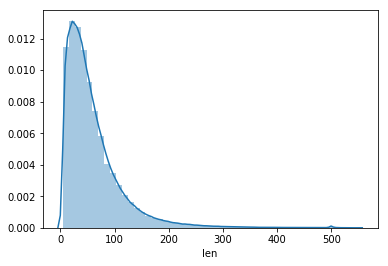

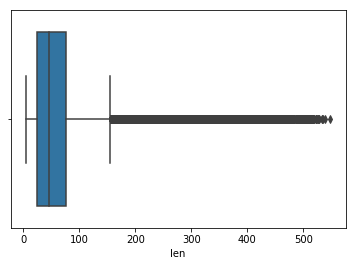

Average: 60.172471131639725
Min: 5
Max: 548
Variance: 2915.79852160788
Std deviation: 53.99813442710665


In [178]:
print_desc_sent(eng_reviews, 'len')

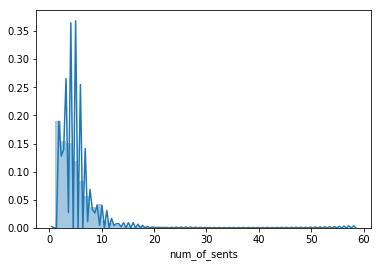

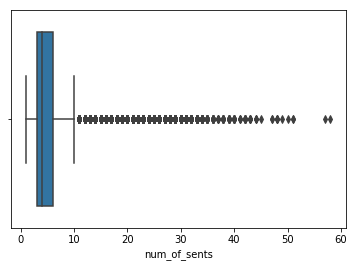

Average: 4.774716215270487
Min: 1
Max: 58
Variance: 10.381879310970403
Std deviation: 3.222092380887054


In [177]:
print_desc_sent(eng_reviews, 'num_of_sents')